# Searching for specific features
-----
Dec 2016.

In [1]:
# preamble
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from labm8 import fs
from labm8 import viz

import clgen
from clgen import corpus

## Experimental Setup

**Start code:**

In [2]:
# print(data[0]['data']['start_code'])
# print("// features:", data[0]['data']['start_features'])

In [3]:
# print(data[0]['data']['target_code'])
# print("// features:", data[0]['data']['target_features'])

**Target code:**

## Experimental results

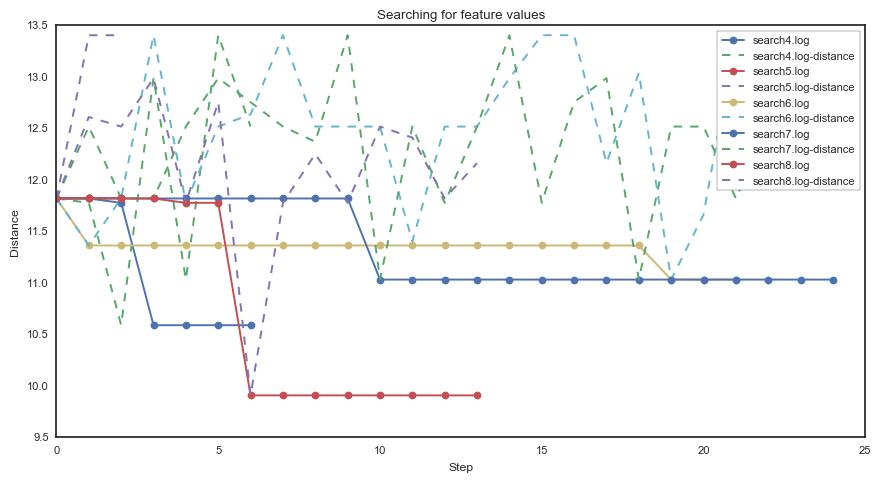

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from labm8 import viz
plt.style.use(["seaborn-white", "seaborn-paper"])

def get_distances(log):
    """ return list of best distances per step """
    
    return dates, bests

logs = [
    'search/search4.log',
    'search/search5.log',
    'search/search6.log',
    'search/search7.log',
    'search/search8.log',
]

for log in logs:
    data = clgen.load_json_file(log)
    start_time = 0  # TODO: Convert date to timestamp: log[0]['date']
    dates = [0]
    bests = [data[0]['data']['distance']]
    distances = [data[0]['data']['distance']]
    for entry in data:
        if entry.get("name") == "step":
            timestamp = 0 # TODO: convert to time: entry.get("date")  
            time = timestamp - start_time # TODO: 
            dates.append(time)
            bests.append(entry['data']['best'])
            distances.append(entry['data']['distance'])
    
    plt.errorbar(range(len(bests)), bests, label=fs.basename(log), fmt='o-')
    plt.errorbar(range(len(bests)), distances, label=fs.basename(log) + "-distance", fmt='--')

ax = plt.gca()
plt.legend(loc='upper right')
ax.get_legend().set_title("")
ax.get_legend().draw_frame(True)

plt.title("Searching for feature values")
plt.xlabel("Step")
plt.ylabel("Distance")
viz.finalise(figsize=(9, 5))

In [26]:
for log in logs:
    data = clgen.load_json_file(log)
    i = 0
    for entry in data:
        if entry.get("name") == "step":
            i += 1
            
            print("// STEP", i)
            distance = entry['data']['distance']
            best = entry['data']['best']
            diff = 1 - distance / best
            print("// distance: {:.2f} (best {:.2f}, {:.2f}%)".format(
                      distance, best, diff * 100))
            print("// features:", entry['data']['features'][0])
            print(entry['data']['code'][0])
            print()

// STEP 1
// distance: 11.82 (best 11.82, 0.00%)
// features: 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0
__kernel void A(__global int* a, const int b) {
  int c = get_global_id(0);
  if (c < b)
    a[b] = b;
}

// STEP 2
// distance: 11.03 (best 11.82, 6.66%)
// features: 0.0, 1.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0
__kernel void A(__global int* a, const int b) {
  int c = get_global_id(0);
  if (c < b)
    a[c] = a[c];
}

// STEP 3
// distance: 12.99 (best 11.03, -17.74%)
// features: 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0
__kernel void A(__global int* a) {
  a[get_global_id(0)] += 2;
}

// STEP 4
// distance: 12.76 (best 12.99, 1.79%)
// features: 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
__kernel void A(__global int* a, const int b) {
  int c = get_global_id(0);
  if (b > 1) {
    barrier(2);
  }
}

// STEP 5
// distance: 12.64 (best 12.76, 0.93%)
// features: 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0
__kernel void A(__global float4* a, __global uint* b, uint c) {
  return A(a, b, c);
}

// STEP 6
